In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [24]:
train_file = pd.read_csv('train.csv')
test_file = pd.read_csv('test.csv')

In [25]:
print(test_file.shape)

(28000, 784)


In [5]:
print(train_file.shape)

(42000, 785)


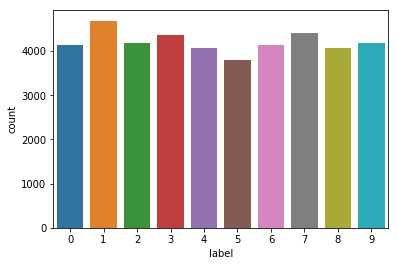

In [7]:
df_x=train_file.iloc[:,1:]
df_y=train_file.iloc[:,0]

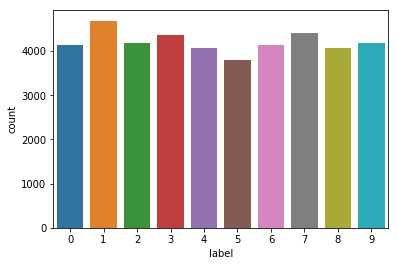

In [8]:
import seaborn as sns
sns.countplot(df_y)

In [16]:
import time
start_time = time.time()
clf=RandomForestClassifier(n_estimators=500,warm_start = True, oob_score =True, random_state = 42,
                           max_features="sqrt")
RF = clf.fit(df_x,df_y)
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=True)

In [17]:

error = 1 - clf.oob_score_
accuracy = 1 - error

print("Accuracy Percentage   : ",(round(accuracy, 4) *100), "%")
print("Error Percentage      : ",(round(error, 4) *100), "%")

Accuracy Percentage   :  96.74000000000001 %
Error Percentage      :  3.26 %


In [18]:
prediction_test = clf.predict(test_file)

In [19]:
display(prediction_test)

array([2, 0, 9, ..., 3, 9, 2])

In [20]:
results_data = pd.DataFrame({'ImageId': range(1, len(prediction_test)+1), 'Label': prediction_test})
results_data.to_csv('results.csv', sep=',', index=False)

In [8]:
import numpy as np
from numpy import array
#import tensorflow as tf
import keras
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

In [10]:

train_set = pd.read_csv('train.csv')

train_label = train_set.label
#Normalize
train_feat = np.array(train_set.iloc[:, 1:])/255
# reshape
train_label = np.array(train_label).reshape(-1, 1)
# one hot encode
encoded_label = to_categorical(train_label)

In [11]:
data = train_feat.reshape((train_feat.shape[0], 28, 28, 1))

In [27]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Valid', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Valid', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(519, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Initialize and compile:
keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(data, encoded_label, validation_split=0.1,  batch_size=64, epochs=1, verbose=0)

In [29]:
predictions = model.predict(np.array(data)).argmax(axis=1)
actual = train_label[:,0]
# Calculate the accuracy
train_accuracy = np.mean(predictions == actual)
# result
print("Train accuracy: ", train_accuracy)

Train accuracy:  0.9954285714285714


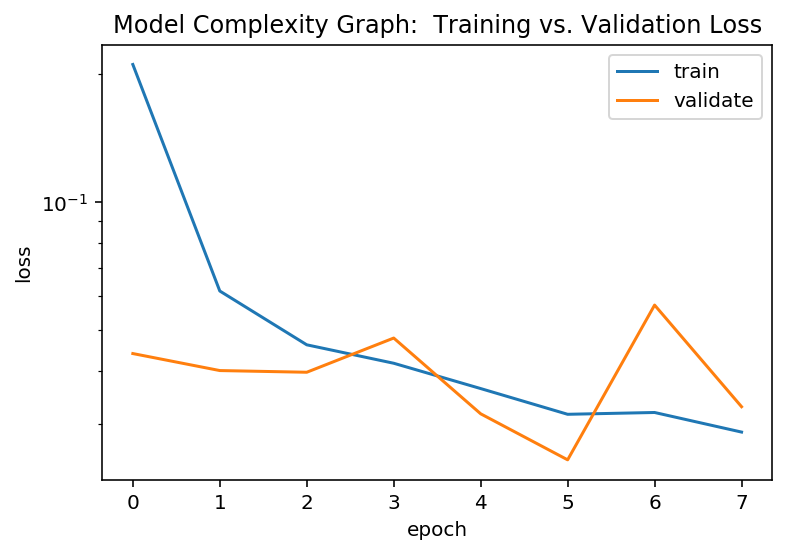

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')

In [31]:
# Load the test set:
test_set = pd.read_csv('test.csv')
# test features:
test_feat = np.array(test_set)/255

In [32]:
test_data = test_feat.reshape((test_feat.shape[0], 28, 28, 1))
predictions = model.predict(np.array(test_data)).argmax(axis=1)

In [33]:
a = pd.DataFrame({'ImageId': range(1, len(predictions)+1), 'Label': predictions})
a.to_csv('CNN_results.csv', sep=',', index=False)